In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

[[63  5]
 [ 3 29]]
Test Sets Accuracy : 92.00%


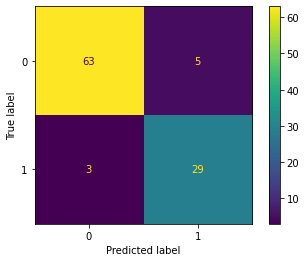

[1.    0.75  0.9   0.95  0.975 0.9   0.8   0.825 0.8   0.95 ]
k-Fold Cross Validation Accuarcy : 88.50%
k-Fold Cross Validation Standard Deviation : 8.15%


In [2]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy' , random_state = 0)
classifier.fit(X_train , y_train)

from sklearn.metrics import confusion_matrix , accuracy_score , ConfusionMatrixDisplay
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test , y_pred)
print(cm)
print("Test Sets Accuracy : {:.2f}%" .format(accuracy_score(y_test , y_pred)*100))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier , X = X , y = y , cv = 10)
print(accuracies)
print("k-Fold Cross Validation Accuarcy : {:.2f}%" .format(accuracies.mean()*100))
print("k-Fold Cross Validation Standard Deviation : {:.2f}%" .format(accuracies.std()*100))